### Importing modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
import os, json, re

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)

%matplotlib inline

### Importing Data

In [ ]:
data = pd.read_csv("./telecom_churn_data.csv")
data.head()

In [ ]:
# look at the shape of the data
data.shape

In [ ]:
# look at number of columns
len(list(data.columns))

In [ ]:
# peek at the data type of data
data.info()

In [ ]:
# look at data statistics
data.describe(include='all')

In [ ]:
initial_column_list = list(data.columns)

id_column_list = ['mobile_number', 'circle_id']

date_column_list = ['last_date_of_month_6',
                     'last_date_of_month_7',
                     'last_date_of_month_8',
                     'last_date_of_month_9',
                     'date_of_last_rech_6',
                     'date_of_last_rech_7',
                     'date_of_last_rech_8',
                     'date_of_last_rech_9',
                     'date_of_last_rech_data_6',
                     'date_of_last_rech_data_7',
                     'date_of_last_rech_data_8',
                     'date_of_last_rech_data_9'
                    ]

cat_column_list =  ['night_pck_user_6',
                     'night_pck_user_7',
                     'night_pck_user_8',
                     'night_pck_user_9',
                     'fb_user_6',
                     'fb_user_7',
                     'fb_user_8',
                     'fb_user_9'
                    ]

### Removing Redundant columns

In [ ]:
# Removing Date and Id Columns
data = data.drop(columns = id_column_list + date_column_list)
data.shape

In [ ]:
# checking columns with single value in all the columns and the corresponding single value
columns_with_single_value = {}
for x in data.columns:
    if len(data[x].value_counts()) == 1:
        columns_with_single_value[x]=list(dict(data[x].value_counts()).keys())[0]
columns_with_single_value

In [ ]:
data = data.drop(columns = columns_with_single_value.keys())
data.shape

### Handle Missing Values

In [ ]:
# print list of missing columns 
data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]

In [ ]:
na_list = list(dict(data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]).keys())
len(na_list)

In [ ]:
zero_impute_list = [x for x in na_list if x not in date_column_list and x not in cat_column_list]
zero_impute_list

As we can see from above all the colummns in the zero_impute_list are either counts, rechaege, mou or data<br>
NaN in the above columns means that there is no count or no recharge done<br>
so we can impute 0 in all the above columns

In [ ]:
# imputing with 0 for recharge, cont, mou, data columns
data[zero_impute_list] = data[zero_impute_list].fillna(0)

In [ ]:
# print list of missing columns 
data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]

Removed all the missing values from the data
### Handling Data Types

In [ ]:
# Handling categorical columns (filling -1 in place of na)
data[cat_column_list] = data[cat_column_list].fillna(-1)

In [ ]:
data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]/len(data.isna())

In [ ]:
cat_column_list_2 = [x for x in cat_column_list if x in data.columns]
data[cat_column_list_2] = data[cat_column_list_2].apply(lambda column: column.astype("category"), axis=0)
data.info()

### Creating Target Variable

In [ ]:
# usage based column creating

data["usage_mou_6"] = data.total_og_mou_6 + data.total_ic_mou_6
data["usage_mou_7"] = data.total_og_mou_7 + data.total_ic_mou_7
data["usage_mou_8"] = data.total_og_mou_8 + data.total_ic_mou_8
data["usage_mou_9"] = data.total_og_mou_9 + data.total_ic_mou_9

data["usage_data_6"] = data.monthly_3g_6 + data.monthly_2g_6
data["usage_data_7"] = data.monthly_3g_7 + data.monthly_2g_7
data["usage_data_8"] = data.monthly_3g_8 + data.monthly_2g_8
data["usage_data_9"] = data.monthly_3g_9 + data.monthly_2g_9

data["usage_6"] = data.usage_data_6 + data.usage_mou_6
data["usage_7"] = data.usage_data_7 + data.usage_mou_7
data["usage_8"] = data.usage_data_8 + data.usage_mou_8
data["usage_9"] = data.usage_data_9 + data.usage_mou_9

In [ ]:
# Creating Columns That show the difference betweenthe 8th month and the average of values of the 6th and 7th month

data['arpu_diff'] = data.arpu_8 - ((data.arpu_6 + data.arpu_7)/2)
data['onnet_mou_diff'] = data.onnet_mou_8 - ((data.onnet_mou_6 + data.onnet_mou_7)/2)
data['offnet_mou_diff'] = data.offnet_mou_8 - ((data.offnet_mou_6 + data.offnet_mou_7)/2)
data['roam_ic_mou_diff'] = data.roam_ic_mou_8 - ((data.roam_ic_mou_6 + data.roam_ic_mou_7)/2)
data['roam_og_mou_diff'] = data.roam_og_mou_8 - ((data.roam_og_mou_6 + data.roam_og_mou_7)/2)
data['loc_og_mou_diff'] = data.loc_og_mou_8 - ((data.loc_og_mou_6 + data.loc_og_mou_7)/2)
data['std_og_mou_diff'] = data.std_og_mou_8 - ((data.std_og_mou_6 + data.std_og_mou_7)/2)
data['isd_og_mou_diff'] = data.isd_og_mou_8 - ((data.isd_og_mou_6 + data.isd_og_mou_7)/2)
data['spl_og_mou_diff'] = data.spl_og_mou_8 - ((data.spl_og_mou_6 + data.spl_og_mou_7)/2)
data['total_og_mou_diff'] = data.total_og_mou_8 - ((data.total_og_mou_6 + data.total_og_mou_7)/2)
data['loc_ic_mou_diff'] = data.loc_ic_mou_8 - ((data.loc_ic_mou_6 + data.loc_ic_mou_7)/2)
data['std_ic_mou_diff'] = data.std_ic_mou_8 - ((data.std_ic_mou_6 + data.std_ic_mou_7)/2)
data['isd_ic_mou_diff'] = data.isd_ic_mou_8 - ((data.isd_ic_mou_6 + data.isd_ic_mou_7)/2)
data['spl_ic_mou_diff'] = data.spl_ic_mou_8 - ((data.spl_ic_mou_6 + data.spl_ic_mou_7)/2)
data['total_ic_mou_diff'] = data.total_ic_mou_8 - ((data.total_ic_mou_6 + data.total_ic_mou_7)/2)
data['total_rech_num_diff'] = data.total_rech_num_8 - ((data.total_rech_num_6 + data.total_rech_num_7)/2)
data['total_rech_amt_diff'] = data.total_rech_amt_8 - ((data.total_rech_amt_6 + data.total_rech_amt_7)/2)
data['max_rech_amt_diff'] = data.max_rech_amt_8 - ((data.max_rech_amt_6 + data.max_rech_amt_7)/2)
data['total_rech_data_diff'] = data.total_rech_data_8 - ((data.total_rech_data_6 + data.total_rech_data_7)/2)
data['max_rech_data_diff'] = data.max_rech_data_8 - ((data.max_rech_data_6 + data.max_rech_data_7)/2)
data['av_rech_amt_data_diff'] = data.av_rech_amt_data_8 - ((data.av_rech_amt_data_6 + data.av_rech_amt_data_7)/2)
data['vol_2g_mb_diff'] = data.vol_2g_mb_8 - ((data.vol_2g_mb_6 + data.vol_2g_mb_7)/2)
data['vol_3g_mb_diff'] = data.vol_3g_mb_8 - ((data.vol_3g_mb_6 + data.vol_3g_mb_7)/2)

In [ ]:
# checking the shape of column upon which we derived target variable
data[data["usage_9"] == 0.0].shape

In [ ]:
# creating churn column based on 9th month data

data["churn"] = data["usage_9"].apply(lambda x: 1 if x == 0.0 else 0)

In [ ]:
# checking out churn counts
data.churn.value_counts()

### Removing 9th month columns

In [ ]:
# detecting all columns with _9 in their name
september_columns = [x for x in data.columns if x.endswith("_9")]
# september_columns

In [ ]:
cat_column_list_3 = [x for x in cat_column_list_2 if x not in september_columns]

In [ ]:
# dropping september columns from data
data = data.drop(columns=september_columns)
data.shape

### Percentage of churn

In [ ]:
# getting percentage of customers with churn

(data.churn.value_counts()/len(data.churn))*100

there is approximately <b>10.40%</b> of churn

### Filtering High Value Customers

In [ ]:
# creating total revenue for the customer for each month

data["total_value_6"] = (data.av_rech_amt_data_6 * data.total_rech_data_6) + data.total_rech_amt_6
data["total_value_7"] = (data.av_rech_amt_data_7 * data.total_rech_data_7) + data.total_rech_amt_7
data["total_value_8"] = (data.av_rech_amt_data_8 * data.total_rech_data_7) + data.total_rech_amt_8

In [ ]:
# getting the 70th percentile value according to the criterioin given

percentile_value_70 = np.percentile((data["total_value_6"] + data["total_value_7"])/2, 70)
percentile_value_70

In [ ]:
# filtering high value customers

hvc = data[(data["total_value_6"] + data["total_value_7"])/2 > percentile_value_70]
hvc.shape

There are 29953 high value customers according to the criteria determined

In [ ]:
# getting percentage of customers with churn

(hvc.churn.value_counts()/len(hvc.churn))*100

There is <b>8.5%</b> churn in high value customers

In [ ]:
list(hvc.columns)

### Utility Functions

In [ ]:
from math import ceil

"""
Plotting Univariate Plots of numerical data
"""
def plot_subset_univariate_num(data:pd.DataFrame, columns:list, target:str=None, target_cat:str=False,figsize:tuple=None):
    num_rows = len(columns)
    if figsize is not None:
        plt.figure(figsize=figsize)
    multiplier = 2
    if target is not None:
        multiplier = 3
    for i,col in enumerate(columns):
        plt.subplot(num_rows,multiplier,multiplier*i+1)
        sns.boxplot(data[col])
        plt.subplot(num_rows,multiplier,multiplier*i+2)
        sns.distplot(data[col])
        if target is not None and target_cat:
            plt.subplot(num_rows,multiplier,multiplier*i+3)
            sns.boxplot(data=data,x=target,y=col)

"""
Plotting Bivariate Plots of numerical data
"""
def plot_subset_bivariate_num_cat(data:pd.DataFrame, columns:list, target:str, figsize:tuple=None):
    num_rows = ceil(len(columns) / 2)
    if figsize is not None:
        plt.figure(figsize=figsize)
    for i,col in enumerate(columns):
        plt.subplot(num_rows,2,i)
        sns.boxplot(data=data,x=target,y=col)

"""
Plotting Univariate plots of categorical data
"""
def plot_subset_univariate_cat(data:pd.DataFrame, columns:list, figsize:tuple=None):
    num_rows = ceil(len(columns)/2)
    if figsize is not None:
        plt.figure(figsize=figsize)
    for i,col in enumerate(columns):
        plt.subplot(num_rows,2,i+1)
        sns.countplot(data[col])

In [ ]:
hvc.shape

### Target Variable Analysis

In [ ]:
# value counts of the churn

hvc.churn.value_counts()

In [ ]:
#plot churn

plot_subset_univariate_cat(hvc, ["churn"])

In [39]:
# percentage of the churn

(hvc.churn.value_counts()/len(hvc.churn))*100

0    91.546757
1     8.453243
Name: churn, dtype: float64

### Univariate Analysis

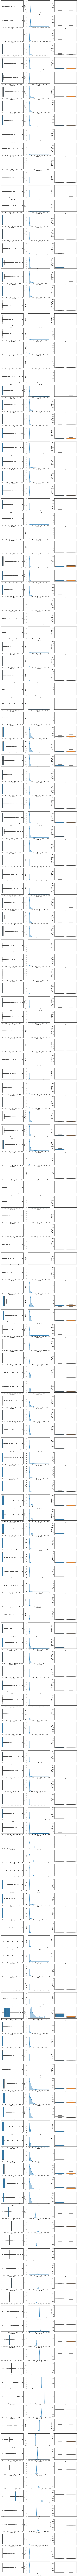

In [40]:
# plotting for each of the numerical variable

num_columns_list = [x for x in hvc.columns if x not in cat_column_list_2]
num_columns_list.remove("churn")
plot_subset_univariate_num(hvc, num_columns_list, "churn", True, (20, 700) )

Observations from above plots

1. For all the features in the data the plots in the months of 6,7,8 look almost similar
2. There are  some outliers present in the data which i will remove in the next steps based on the above box plots
3. Most of the features except for some categorical features are left skewed

### Removing Outliers

Removing the outliers from the data selectively from the above box plots

In [41]:
from sklearn.neighbors import LocalOutlierFactor

print("shape before removing outliers ", hvc.shape )

lof = LocalOutlierFactor()
yhat = lof.fit_predict(hvc[num_columns_list])
mask = yhat != -1

hvc = hvc[mask]
print("shape after removing outliers ", hvc.shape )

shape before removing outliers  (29953, 188)
shape after removing outliers  (28041, 188)


### Bivariate Analysis

<AxesSubplot:>

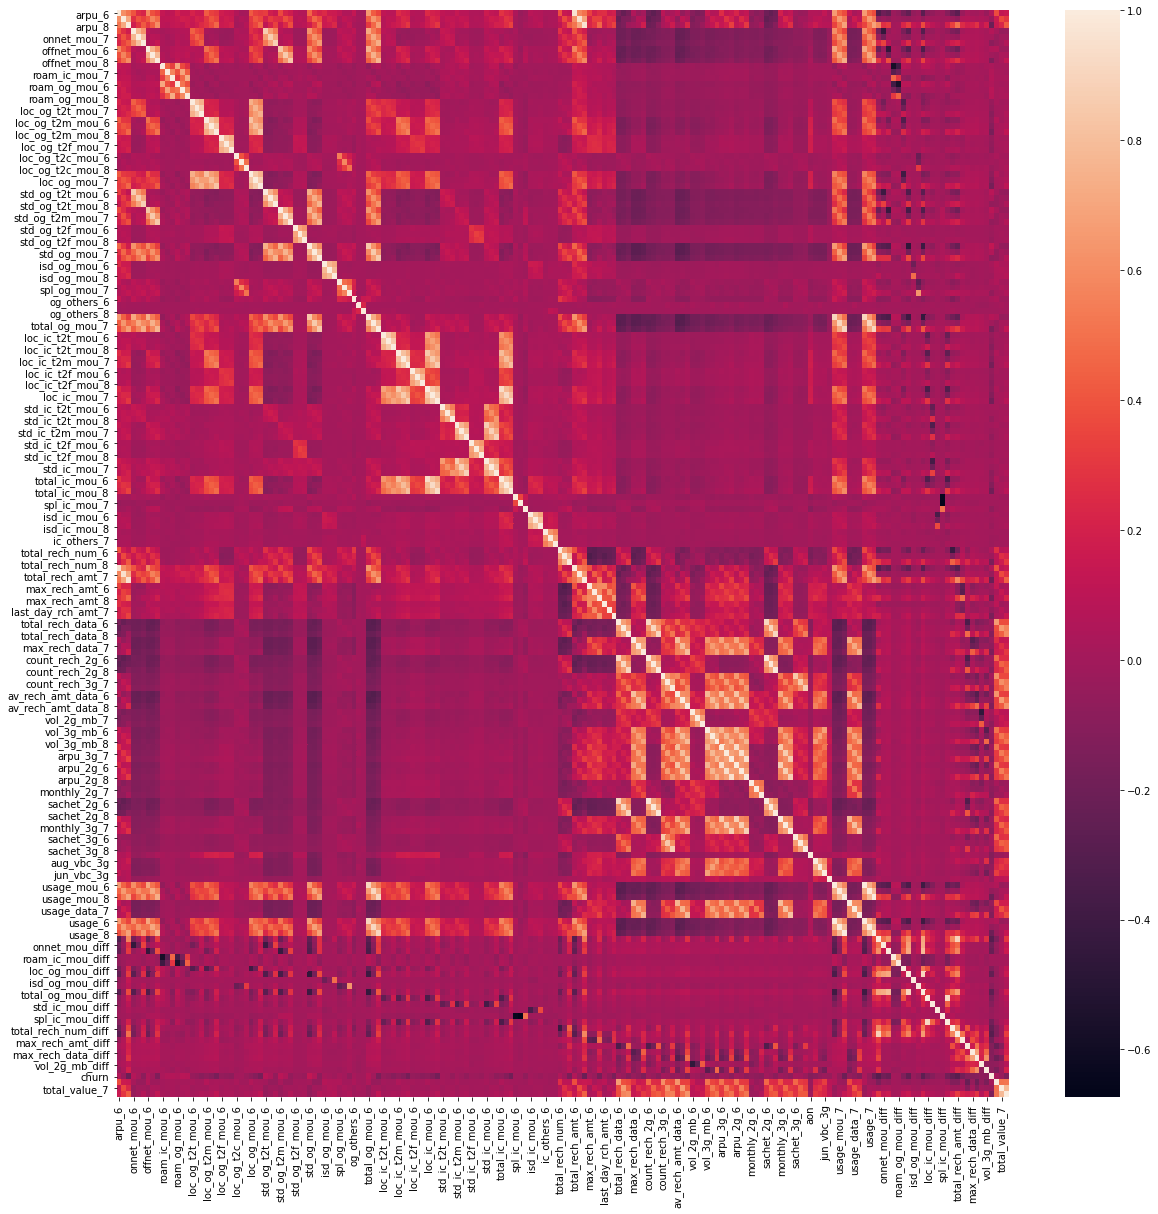

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(hvc.corr())

### Data Preparation

In [43]:
# splitting data into train and test sets
# since there is class imbalance we are using stratify option

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(hvc.drop(columns="churn"), hvc.churn, train_size=0.75, random_state=42, stratify = hvc.churn)

In [44]:
hvc.churn.value_counts()/len(hvc)

0    0.917086
1    0.082914
Name: churn, dtype: float64

In [45]:
y_train.value_counts()/len(y_train)

0    0.917071
1    0.082929
Name: churn, dtype: float64

In [46]:
y_test.value_counts()/len(y_test)

0    0.91713
1    0.08287
Name: churn, dtype: float64

### Data Scaling

In [47]:
# Using Standard Scaling for numerical columns only

from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
x_train[num_columns_list] = scaling.fit_transform(x_train[num_columns_list])
x_test[num_columns_list] = scaling.transform(x_test[num_columns_list])
x_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_value_6,total_value_7,total_value_8
72122,0.225901,-1.494375,-1.272164,1.948514,-0.583453,-0.540940,-0.666371,-0.783855,-0.728827,-0.229471,...,-0.877129,-0.832673,-0.871827,-0.084420,-0.229027,-0.341289,0.010568,0.051285,-0.828898,-0.756302
11089,1.268804,0.510196,0.475090,0.276977,-0.246655,-0.148178,-0.016001,0.015543,0.255599,-0.144272,...,-0.625148,0.318163,0.543220,0.517580,1.452491,-0.116760,1.214000,0.195939,-0.057456,0.101045
77026,-0.377083,-0.119288,0.029340,-0.353431,-0.167986,-0.166251,-0.012951,0.099064,0.208065,-0.229471,...,0.371452,0.401024,0.071537,0.088568,0.097019,0.093938,0.010568,-0.522316,-0.400722,-0.298783
35140,-0.415350,-0.290818,3.782251,-0.569723,-0.333225,2.244124,-0.293045,-0.403241,0.163822,-0.229471,...,5.256773,1.105336,0.071537,0.088568,0.097019,0.093938,0.010568,-0.555763,-0.423220,1.055343
62801,-0.123816,0.429343,0.752835,-0.426503,-0.404153,-0.405142,0.289156,1.200099,1.211072,-0.229471,...,0.876830,0.087996,0.071537,0.088568,0.097019,0.093938,0.010568,-0.371809,-0.269367,-0.011131


### Dimentionality Reduction with PCA

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train[num_columns_list])

PCA()

In [49]:
var_explain = {k:v*100 for (k,v) in dict(zip(num_columns_list, pca.explained_variance_ratio_)).items() if v*100 > .2}
var_explain

{'arpu_6': 11.901121842297991,
 'arpu_7': 9.68079631440021,
 'arpu_8': 5.6550082364735035,
 'onnet_mou_6': 5.200544466209937,
 'onnet_mou_7': 4.533693367740935,
 'onnet_mou_8': 3.2389592713810886,
 'offnet_mou_6': 2.6427474462702865,
 'offnet_mou_7': 2.5725593808624643,
 'offnet_mou_8': 2.28303821473942,
 'roam_ic_mou_6': 2.0951450460378083,
 'roam_ic_mou_7': 1.9686292651606903,
 'roam_ic_mou_8': 1.8610716441471158,
 'roam_og_mou_6': 1.7171287525122436,
 'roam_og_mou_7': 1.599852094097947,
 'roam_og_mou_8': 1.5469494050203016,
 'loc_og_t2t_mou_6': 1.5059152783952465,
 'loc_og_t2t_mou_7': 1.4827366501819461,
 'loc_og_t2t_mou_8': 1.4380820503867024,
 'loc_og_t2m_mou_6': 1.3764022967243081,
 'loc_og_t2m_mou_7': 1.3183773287902445,
 'loc_og_t2m_mou_8': 1.2933430055449209,
 'loc_og_t2f_mou_6': 1.2706646902504923,
 'loc_og_t2f_mou_7': 1.236966822937078,
 'loc_og_t2f_mou_8': 1.1411449320003084,
 'loc_og_t2c_mou_6': 1.0987814369026168,
 'loc_og_t2c_mou_7': 0.987271891641692,
 'loc_og_t2c_mou_8

In [50]:
# percentage of variance explained by pca
sum(var_explain.values())

95.57317675429151

In [51]:
# number of components
len(var_explain.values())

72

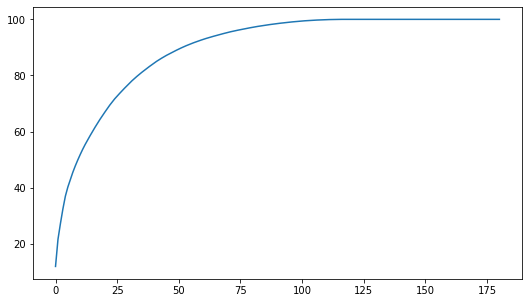

In [52]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.plot(cumulative_variance)

In [53]:
# doing pca with 70 components as they explain about 95% of variance

pca = PCA(70)
x_train_pca = pca.fit_transform(x_train[num_columns_list])
x_train_pca.shape

(21030, 70)

In [54]:
sum(pca.explained_variance_ratio_)

0.9510853389658868

In [55]:
# adding categorical columns to x_train_pca
x_train_pca = np.concatenate((x_train_pca, x_train[cat_column_list_3]), axis=1)
x_train_pca.shape

(21030, 76)

In [56]:
# applying pca for test set also
x_test_pca = pca.transform(x_test[num_columns_list])
x_test_pca = np.concatenate((x_test_pca, x_test[cat_column_list_3]), axis=1)
x_test_pca.shape

(7011, 76)

### Building Logistic Regression Baseline

In [57]:
# defining base logistic regression function
from sklearn.linear_model import LogisticRegression

# using penality as l1 because there are a lot of features 
# with very less importance
lr = LogisticRegression(penalty="l1",class_weight={0:0.1, 1:0.9}, solver="liblinear")
lr.fit(x_train_pca, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, penalty='l1',
                   solver='liblinear')

In [58]:
lr.coef_

array([[-0.14199532, -0.31503677,  0.14717172, -0.42361157,  0.10421577,
         0.00125181,  0.01408443,  0.08025878,  0.1236871 ,  0.06619894,
         0.00890508,  0.01719503,  0.07454053, -0.24734929,  0.09703879,
        -0.11766402, -0.05922368, -0.08211134, -0.06841169,  0.04701313,
         0.24111527, -0.14758318, -0.08276035, -0.10902698, -0.14834915,
         0.22855357,  0.04484193, -0.30368071,  0.0675257 ,  0.04160759,
         0.05803508, -0.06863131, -0.13357933, -0.05553565, -0.03196369,
        -0.25233933, -0.08863071,  0.05676113, -0.39825785, -0.1689119 ,
        -0.18248514, -0.35408189, -0.08153218, -0.35047556,  0.01899559,
        -0.96639459,  0.03392692, -0.16714433,  0.2037616 ,  0.01600198,
         0.02310386, -0.26533304,  0.17793908,  0.08721284, -0.11548532,
         0.02120245,  0.        , -0.07356964, -0.11092036, -0.08193711,
         0.05214447, -0.23988417, -0.00589239, -0.15917029, -0.08410157,
         0.35392258, -0.22411487,  0.07414166, -0.3

In [59]:
# function to calculate specificity which we need to optimise in this task
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn+fp)

In [60]:
# importing metrics and printing confusion for training data
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score

y_train_pred = lr.predict(x_train_pca)
confusion_matrix(y_train, y_train_pred)

array([[16334,  2952],
       [  321,  1423]])

In [61]:
# roc_auc score for training data
roc_auc_score(y_train, y_train_pred)

0.8314379839632685

In [62]:
# calculating specificity for training data
specificity(y_train, y_train_pred)

0.84693560095406

In [63]:
# printing confusion for testing data
y_test_pred = lr.predict(x_test_pca)
confusion_matrix(y_test, y_test_pred)

array([[5430, 1000],
       [ 119,  462]])

In [64]:
# roc_auc score for testing data
roc_auc_score(y_test, y_test_pred)

0.8198298637785981

In [65]:
# calculating specificity for testing data
specificity(y_test, y_test_pred)

0.8444790046656299

### Building and Tuning Random Forest Based Model

In [ ]:
# defining a Random Forest model, rf with class_weight to handle class imbalance

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

params = {
#     'n_estimators' : [50, 100, 200],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split' : [5, 10, 20],
#     'max_features' : [1, 2, 5, 10, 20],
#     'criterion': ["gini", "entropy"]
}

model = GridSearchCV(estimator=rf, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=5)

In [ ]:
#fitting the data in the model
model.fit(x_train_pca, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", best_rf_model_pca.best_score_)
print("Best hyperparameters: ", best_rf_model_pca.best_params_)

In [ ]:
best_rf_model_pca = RandomForestClassifier(max_depth= 20, min_samples_leaf=20, min_samples_split=10, oob_score=True)

In [ ]:
best_rf_model_pca.fit(x_train_pca, y_train)

In [ ]:
# print confusion matrix for train data
y_train_pred = best_rf_model_pca.predict(x_train_pca)
confusion_matrix(y_train, y_train_pred)

In [ ]:
# roc_auc score for training data
roc_auc_score(y_train, y_train_pred)

In [ ]:
# calculating specificity for training data
specificity(y_train, y_train_pred)

In [ ]:
# print confusion matrix for test data
y_test_pred = best_rf_model_pca.predict(x_test_pca)
confusion_matrix(y_test, y_test_pred)

In [ ]:
# roc_auc score for tetsing data
roc_auc_score(y_test, y_test_pred)

In [ ]:
# calculating specificity for testing data
specificity(y_test, y_test_pred)

### Building and XGBoost Model

In [67]:
# A parameter grid for XGBoost

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

params = {
#         'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 800

model_xgb = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', 
                                   n_jobs=-1, cv=5, verbose=3, random_state=42)

In [ ]:
model_xgb.fit(x_train_pca, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


In [ ]:
boost_model_pca = model_xgb.best_estimator_

In [ ]:
y_train_pred = boost_model_pca.predict(x_train_pca)
confusion_matrix(y_train, y_train_pred)

In [ ]:
roc_auc score for training data
roc_auc_score(y_train, y_train_pred)

In [ ]:
specificity(y_train, y_train_pred)

In [ ]:
y_test_pred = boost_model_pca.predict(x_test_pca)
confusion_matrix(y_test, y_test_pred)

In [ ]:
roc_auc_score(y_test, y_test_pred)

In [ ]:
specificity(y_test, y_test_pred)

### Selecting the best model based on evaluation

Random forest model is working better asthe number of false positives are less in this model<br>
so we can use the random forest model for final prediction of churn

### Selecting Best Features

In [ ]:
# defining a Random Forest model, rf with class_weight to handle class imbalance

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

params = {
#     'n_estimators' : [50, 100, 200],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50],
#     'min_samples_split' : [5, 10, 20, 50],
    "max_features": ['auto', 0.4],
    'criterion': ["gini", "entropy"]
}

rf_model = GridSearchCV(estimator=rf, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=5)

In [ ]:
rf_model.fit(x_train, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", rf_model.best_score_)
print("Best hyperparameters: ", rf_model.best_params_)

In [ ]:
best_rf_model = rf_model.best_estimator_

In [ ]:
best_rf_model.

In [ ]:
# printing confusion matrix for 
y_train_pred = best_rf_model.predict(x_train)
confusion_matrix(y_train, y_train_pred)

In [ ]:
# roc_auc score for training data
roc_auc_score(y_train, y_train_pred)

In [ ]:
# calculating specificity for training data
specificity(y_train, y_train_pred)

In [ ]:
#printing confusion matrix for testing data
y_test_pred = best_rf_model.predict(x_test)
confusion_matrix(y_test, y_test_pred)

In [ ]:
# calculating roc_auc score for test data
roc_auc_score(y_test, y_test_pred)

In [ ]:
# calculating specificity of the testing data
specificity(y_test, y_test_pred)

In [ ]:
# extracting top 10 features basd on the importance given by random forest model
features = x_train.columns

importance = best_rf_model.feature_importances_

imp_df = pd.DataFrame({'features': features, 'importance': importance*100})
imp_df = imp_df[['features', 'importance']]

imp_df = imp_df.sort_values('importance', ascending=False).reset_index(drop=True)
imp_df.head(10)

In [ ]:
# checking the correlation of top 10 features with target set
hvc[list(imp_df.features[0:10])+["churn"]].corr().sort_values('churn', ascending=False)["churn"]

##### Best Features
roam_og_mou_8, last_day_rch_amt_8 , total_og_mou_8 , loc_ic_t2m_mou_8, total_ic_mou_8, usage_mou_8, usage_8 , total_og_mou_diff, total_rech_amt_diff

##### Inference
1. Need to provide good offers to people from roaming zone.
2. Need to provide good offers to people using STD and ISD calls frequestly.